

<center><h1>Lab 4: 2D projective geometry and homography estimation</h1></center>

<b>Exercise 1: Homogeneous and homogeneous transforms<b>
     
<p>Homogeneous adds a dimension to the normal affine. To do an operation in Homogeneous, We multiple matrices to the left with every next operation insteadof doing functions composites. in the example below, I have first ranslated the point 10 10 10 to 20 along the axis, Z rotate 30 deg, and Y rotate -10 deg. The second point deals with y y=rotation first and then z rotation. Rotating by an axis changes the output.<p>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook
x = 10
y = 10
z = 10
w = 1
Point = np.array([x,y,z])
Homogeneous = np.array([x,y,z,w])

Translate = np.array([0,10,0])

T = Point + Translate
print("Translate",T)
xtheta, ytheta, ztheta = 0, -10, 30


# cos sin values
cx, sx = np.cos(xtheta), np.sin(xtheta)
cy, sy = np.cos(ytheta), np.sin(ytheta)
cz, sz = np.cos(ztheta), np.sin(ztheta)
# x rotation matrix
Qx = np.array([[1, 0, 0], 
                    [0, cx, -sx], 
                    [0, sx, cx]])
# y rotation matrix
Qy = np.array([[cy, 0, sy], 
                    [0, 1, 0], 
                    [-sy, 0, cy]])
# z rotation matrix
Qz = np.array([[cz, -sz, 0], 
                    [sz, cz, 0], 
                    [0, 0, 1]])

T = np.matmul(Qz, T)
print("rotate z", T)

T = np.matmul(Qy, T)
print("rotate y",T)

QyQz = np.matmul(Qy, Qz)
print("QzQy",QyQz)
T = Point + Translate
T = np.matmul(QyQz, T)
print("reasult 1",T)
QzQy = np.matmul(Qz, Qy)

HomogeneousRot = np.empty((4,4))
HomogeneousRot[:3, :3] = QyQz
HomogeneousRot[:3, 3] = [0,0,0]
HomogeneousRot[3,:] = [0,0,0,1]

HomogeneousRot1 = np.empty((4,4))
HomogeneousRot1[:3, :3] = QzQy
HomogeneousRot1[:3, 3] = [0,0,0]
HomogeneousRot1[3,:] = [0,0,0,1]

HomogeneousT = np.empty((4,4))
HomogeneousT[:3, :3] = np.identity(3)
HomogeneousT[:3, 3] = Translate
HomogeneousT[3,:] = [0,0,0,1]

HomogeneousRotZ = np.empty((4,4))
HomogeneousRotZ[:3, :3] = Qz
HomogeneousRotZ[:3, 3] = [0,0,0]
HomogeneousRotZ[3,:] = [0,0,0,1]


HomogeneousRotY = np.empty((4,4))
HomogeneousRotY[:3, :3] = Qy
HomogeneousRotY[:3, 3] = [0,0,0]
HomogeneousRotY[3,:] = [0,0,0,1]

print("Hom Rot",HomogeneousRot)
print("Hom transate",HomogeneousT)
outa = np.matmul(HomogeneousT, Homogeneous)
outb = np.matmul(HomogeneousRotZ, outa)
out = np.matmul(HomogeneousRot, np.matmul(HomogeneousT, Homogeneous))
out1b = np.matmul(HomogeneousRotY, outa)
out1 = np.matmul(HomogeneousRot1, np.matmul(HomogeneousT, Homogeneous))
print("output of first",out)
print("output of second",out1)
colors = ['red', 'green', 'blue', 'yellow', 'orange']
labels = ['input', 'y tran', 'z rot', 'z rot, y rot','y rot', 'y rot, z rot']


input = [10,10,10]
input = np.array([input]).T
out = np.array([out]).T
outa = np.array([outa]).T
outb = np.array([outb]).T
out1b = np.array([out1b]).T
out1 = np.array([out1]).T
fig = plt.figure()
fig.set_size_inches(5, 5)
ax = plt.axes(projection="3d")
ax.scatter(*input)
ax.scatter(*outa)
ax.scatter3D(*outb )
ax.scatter3D(*out )
ax.scatter3D(*out1b )
ax.scatter3D(*out1 )
plt.legend(labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


Translate [10 20 10]
rotate z [21.30314698 -6.79528724 10.        ]
rotate y [-12.434653    -6.79528724 -19.98007698]
QzQy [[-0.129428   -0.82902921  0.54402111]
 [-0.98803162  0.15425145  0.        ]
 [-0.08391605 -0.53751006 -0.83907153]]
reasult 1 [-12.434653    -6.79528724 -19.98007698]
Hom Rot [[-0.129428   -0.82902921  0.54402111  0.        ]
 [-0.98803162  0.15425145  0.          0.        ]
 [-0.08391605 -0.53751006 -0.83907153  0.        ]
 [ 0.          0.          0.          1.        ]]
Hom transate [[ 1.  0.  0.  0.]
 [ 0.  1.  0. 10.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
output of first [-12.434653    -6.79528724 -19.98007698   1.        ]
output of second [ 19.30551293   6.00022044 -13.8309264    1.        ]


<IPython.core.display.Javascript object>

c:\Users\Dariu\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
c:\Users\Dariu\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:1106: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


Text(0.5, 0, 'Z')


<p><b><font size="+1">Exercise 2: </font></b><meta charset="utf-8"> <strong><font size="+1">2D projective Geometry: Points, lines and their incidence.</font></strong><b>
    <br><br>
This next example I need to construct the mid points and vanishing opints. The order of operation is top left, top right, bottom left, bottom right. It takes homogeneousse cordinates, and cross product to do intersections and lines.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
  
def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input
    return out

arrPoints = []
img = "football_field.jpg"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)


while len(arrPoints)<4:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
print(arrPoints)
HomogeneousCords = []
for i in arrPoints:
    HomogeneousCords.append(convertPoint2Homog(i))


# topL, topR, bottomL, bottomR
p1, p2, p3, p4 = HomogeneousCords

#diagnal lines
l1 = np.cross(p1, p4)
l2 = np.cross(p2, p3)
# mid point
p_m = np.cross(l1, l2)
p_m = p_m/p_m[2]
print("mid",p_m)
Input = cv.circle(Input, (int(p_m[0]),int(p_m[1])), radius=10, color=(0, 0, 255), thickness=-1)
while True:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break

#side line
l3 = np.cross(p1, p3)
l4 = np.cross(p2, p4)
#vanishing point
p_inf = np.cross(l3, l4)
p_inf = p_inf/p_inf[2]
Input = cv.line(Input, (int(p_m[0]),int(p_m[1])), (int(p_inf[0]),int(p_inf[1])),  color=(0, 0, 255), thickness=5) 
while True:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
print("vanshing point",p_inf)
cv.destroyAllWindows()

[array([280, 251]), array([572, 197]), array([395, 700]), array([1013,  431])]
mid [531.28406552 312.70686466   1.        ]
vanshing point [218.06901268   9.19988428   1.        ]



</p><p> b. Constructing mid line in video sequence <b>(1)</b>
<br>This is just the implementation of the mid point of 4 tacking points</br>
    
<br>
    Can you solve the midpoint problem if the helicopter landing pad is circular and has no other markings?
    <br>
The mid point is just getting the center point of a circle function, (x-a)^2 + (y-b)^2 = r^2. Simply put there should be a way to determine the mid point. I think the simplist would be to start at a point, and then find the longest distance across to another point on the circle. Then do the same on a different point, and then determine the mid point using cross.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import lk as tracker
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
  
def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input
    return out

def findMidPoint(points):
   p1, p2, p3, p4 = [convertPoint2Homog(i) for i in points]
   #diagnal lines
   l1 = np.cross(p1, p4)
   l2 = np.cross(p2, p3)
   # mid point
   p_m = np.cross(l1, l2)
   p_m = p_m/p_m[2]
   return p_m

def drawMidCross(image,p1,p2,p3,p4):
   cv.line(image, (int(p1[0]),int(p1[1])), (int(p4[0]),int(p4[1])),  color=(0, 0, 255), thickness=5) 
   cv.line(image, (int(p2[0]),int(p2[1])), (int(p3[0]),int(p3[1])),  color=(0, 0, 255), thickness=5) 
   return image
def drawTrackPoints(image, arrP):
    for i in arrP:
        image = cv.circle(image, (int(i[0]),int(i[1])), radius=10, color=(0, 0, 255), thickness=-1)
    return image
        

cam = cv.VideoCapture(0)
ret, Input = cam.read()
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
arrPoints = []
while len(arrPoints)<4:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
init_corners = np.array(arrPoints).T
tracker.initTracker(Input, init_corners)
cv.destroyAllWindows()
while True:
    # read frame
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    points = tracker.updateTracker(frame)
    points = points.T
    mPoint = findMidPoint(points)
    frame = cv.circle(frame, (int(mPoint[0]),int(mPoint[1])), radius=10, color=(0, 0, 255), thickness=-1)
    frame = drawMidCross(frame, *points)
    frame = drawTrackPoints(frame, points)

    cv.imshow("test", frame)
    k = cv.waitKey(1)
    if k%256 == 27:
    # ASCII:ESC pressed, exit
        print("Escape hit, closing...")
        break
cv.destroyAllWindows()

Escape hit, closing...



<p> c. Parallel lines and  line to line<b>(1)</b>
</p><ul>
This exercise we are using the functions line-to-line
(l<sub>1</sub> x l<sub>2</sub>) x (l<sub>3</sub> x l<sub>4</sub>) . This is to determine if lines are parallel. Closer to 0 means they are close to parallel<br>
    
The second function is line-to-line: epar(l) = 
line: ell(y) = y<sub>1</sub> . (y<sub>3</sub> x y<sub>4</sub>) + y<sub>2</sub>. (y<sub>3</sub> x y<sub>4</sub>). <br>
for each pair of points, you click to make a line.
</li></ul>

<br>


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import lk as tracker
import lk as tracker1
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
  
def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input
    return out

   
def drawParallelLine(image,p1,p2,p3,p4):
    cv.line(image, (int(p1[0]),int(p1[1])), (int(p2[0]),int(p2[1])),  color=(0, 0, 255), thickness=5) 
    cv.line(image, (int(p3[0]),int(p3[1])), (int(p4[0]),int(p4[1])),  color=(0, 0, 255), thickness=5) 
    return image

def epar (points1, points2):
    p1, p2, p3, p4 = [convertPoint2Homog(i) for i in points1]
    p5, p6, p7, p8 = [convertPoint2Homog(i) for i in points2]
    l1 = np.cross(p1, p2)
    l2 = np.cross(p3, p4)
    l3 = np.cross(p5, p6)
    l4 = np.cross(p7, p8)
    cross1 = np.cross(l1, l2)
    cross2 = np.cross(l3, l4)
    result = np.cross(cross1, cross2)
    return result/result[2]
def ell (p1,p2,p3,p4):
    l1 = np.cross(p3, p4)
    return np.dot(p1, l1) + np.dot(p2, l1)
   


cam = cv.VideoCapture(0)
ret, Input = cam.read()
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
arrPoints = []
while len(arrPoints)<8:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
arrPoints1, arrPoints2 =  arrPoints[:len(arrPoints)//2], arrPoints[len(arrPoints)//2:]
init_corners1 = np.array(arrPoints1).T


tracker.initTracker(Input, init_corners1)
cv.destroyAllWindows()
while True:
    # read frame
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    points = tracker.updateTracker(frame)
    points = points.T
    # mPoint = findMidPoint(points)
    # frame = cv.circle(frame, (int(mPoint[0]),int(mPoint[1])), radius=10, color=(0, 0, 255), thickness=-1)
    # frame = drawMidCross(frame, *points)
    frame = drawTrackPoints(frame, points)
    frame = drawParallelLine(frame, *points)
    
    
    frame = drawParallelLine(frame, *arrPoints2)
    eparResult = epar(points, arrPoints2)
    eparResult = eparResult/eparResult[2]
    eparResult = str(np.linalg.norm(eparResult[:2]))
    frame = cv.putText(frame, 'epar' + eparResult, (0,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    # frame = cv.putText(frame, 'OpenCV', (240,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    cv.imshow("test", frame)
    k = cv.waitKey(1)
    if k%256 == 27:
    # ASCII:ESC pressed, exit
        print("Escape hit, closing...")
        break
cv.destroyAllWindows()

Escape hit, closing...


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import lk as tracker
import lk as tracker1
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
  
def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input
    return out

   
def drawParallelLine(image,p1,p2,p3,p4):
    cv.line(image, (int(p1[0]),int(p1[1])), (int(p2[0]),int(p2[1])),  color=(0, 0, 255), thickness=5) 
    cv.line(image, (int(p3[0]),int(p3[1])), (int(p4[0]),int(p4[1])),  color=(0, 0, 255), thickness=5) 
    return image

def epar (points1, points2):
    p1, p2, p3, p4 = [convertPoint2Homog(i) for i in points1]
    p5, p6, p7, p8 = [convertPoint2Homog(i) for i in points2]
    l1 = np.cross(p1, p2)
    l2 = np.cross(p3, p4)
    l3 = np.cross(p5, p6)
    l4 = np.cross(p7, p8)
    cross1 = np.cross(l1, l2)
    cross2 = np.cross(l3, l4)
    result = np.cross(cross1, cross2)
    return result/result[2]
def ell (points):
    p1, p2, p3, p4 = [convertPoint2Homog(i) for i in points]
    l1 = np.cross(p3, p4)
    l1 = l1/l1[2]
    return np.dot(p1, l1) + np.dot(p2, l1)
   


cam = cv.VideoCapture(0)
ret, Input = cam.read()
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
arrPoints = []
while len(arrPoints)<4:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
constantPoints = arrPoints[2:4]
arrPoints[2:4] = [0,0], [0,0]
init_corners = np.array(arrPoints).T

tracker.initTracker(Input, init_corners)
cv.destroyAllWindows()
while True:
    # read frame
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    points = tracker.updateTracker(frame)
    points = points.T
    # mPoint = findMidPoint(points)
    # frame = cv.circle(frame, (int(mPoint[0]),int(mPoint[1])), radius=10, color=(0, 0, 255), thickness=-1)
    # frame = drawMidCross(frame, *points)
    frame = drawTrackPoints(frame, [constantPoints[0], constantPoints[1], [0,0], [0,0]])
    frame = drawParallelLine(frame, *[constantPoints[0], constantPoints[1], points[0], points[1]])
    frame = drawTrackPoints(frame, points)
    
    # frame = drawParallelLine(frame, *arrPoints2)
    # eparResult = epar(points, arrPoints2)
    # eparResult = eparResult/eparResult[2]
    # eparResult = str(np.linalg.norm(eparResult[:2]))
    frame = cv.putText(frame, 'ell: ' + str(ell([constantPoints[0], constantPoints[1], points[0], points[1]])), (0,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    # frame = cv.putText(frame, 'OpenCV', (240,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    cv.imshow("test", frame)
    k = cv.waitKey(1)
    if k%256 == 27:
    # ASCII:ESC pressed, exit
        print("Escape hit, closing...")
        break
cv.destroyAllWindows()

Escape hit, closing...



<b><font size="+1">Exercise 3: Homography estimation in static images </font></b> 
There are 3 different homography algorithms I ave used below. The first is the normal SVD, taking the V, The second one is taking the L1 isntead of L2, and the third is normalizing the SVD. Pressing b swaps between the L1, and pressing c swaps for normalization.


With close to perfect homagraphy points, there are no differences, and I have tested from 4 to 6 and they look the same. Sabatoging it doesnt really change the image much. Teh values I get are very small so I am not sure if there is such difference. The purpose of the other 2 algorithms is to improve the accuracy, but it doesn't seem to be the case.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
points = 7

def getA(x, y):
    A = np.zeros((2, 9))
    A[0, 3:6] = -x* y[2]
    A[0, 6:9] = x* y[1]
    A[1, :3] = x*y[2]
    A[1, 6:9] = -x*y[0]
    return A
# print(A)

decent = False
normalize = False

img1 = cv. imread("key1.jpg")
img2 = cv. imread("key3.jpg") 

Input = img1.copy()
cv.namedWindow("test1")
cv.setMouseCallback("test1", draw_point)

arrPoints = []
while len(arrPoints)<points:
    # dIm[dIm>=80] = 255
    cv.imshow("test1", Input)
    # cv.imshow("test2", img2)  
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
cv.namedWindow("test2")
cv.setMouseCallback("test2", draw_point)
img1Points = arrPoints.copy()
arrPoints = []
img1 = Input.copy()
Input = img2.copy()
# img1 = drawPointtoImg(img1, img1Points)
while len(arrPoints)<points:
    # dIm[dIm>=80] = 255
    cv.imshow("test1", img1)
    cv.imshow("test2", Input)  
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
img2Points = arrPoints.copy()
img2 = Input.copy()

def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input[:2]
    return out
def solveForH(img1Points, img2Points, normalize):
    global t_norm, t_norm_1
    A = []
    for i in range (points):
        x = np.array(convertPoint2Homog(img1Points[i]))
        x_1 = np.array(convertPoint2Homog(img2Points[i]))
        if normalize:
            x = np.matmul(t_norm,x.T)*np.sqrt(2)
            x_1 = np.matmul(t_norm_1, x_1.T)
        A.append(getA(x, x_1))
    

    B = np.concatenate((A[0], A[1], A[2], A[3]), axis=0)
    U, S, V = np.linalg.svd(B)
    # print(V[:, -1])
    H = V[-1, :]
    if decent:
        for j in range(10):

            min = np.matmul(B,H)
            min = np.abs(min)
            min[min<1e-14] = 1e-14

            n = np.diag(1/np.sqrt(min))
            B = np.matmul(n,np.array(B))
            U, S, V = np.linalg.svd(B)
            # print(V[:, -1])
            H = V[-1, :]
    H = H.reshape(3,3)
    if normalize:
        H =  H * np.sqrt(2)
        H = np.matmul(np.linalg.inv(t_norm_1), H)
        H = np.matmul(H, t_norm)
        # H = H*15
    # print(H)
    return H

# h, w = np.mean(img1Points, axis=0)
# h_1, w_1 = np.mean(img2Points, axis=0)


h, w, t = img1.shape
h_1, w_1, t = img2.shape
t_norm = np.linalg .inv(np.array([[w+h, 0, w/2],
                                [0, w+h, h/2],
                                [0,0,1]]))
t_norm_1 = np.linalg.inv(np.array([[w_1+h_1, 0, w_1/2],
                                    [0, w_1+h_1, h_1/2],
                                    [0,0,1]]))
norm1 = []
norm2 = []

height, width = img2.shape[:2]
mean1 = np.array([w,h])
mean2 = np.array([w_1,h_1])
norm1 = img1Points - mean1
norm2 = img2Points - mean2
while True:
    H = solveForH(img1Points, img2Points, normalize)
    print(H)

    img1 = cv. imread("key1.jpg")
    dst = cv.warpPerspective(img1, H, (width,height))
    dst = cv.putText(dst, 'norm?: ' + str(normalize), (0,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    dst = cv.putText(dst, 'decent?: ' + str(decent), (240,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    # dIm[dIm>=80] = 255
    cv.imshow("test1", img1)
    cv.imshow("test2", img2)  
    cv.imshow("Res", dst)
    # cv.imshow("res1", dst1)
    k = cv.waitKey(0)
    if k%256 == 27:
        break
    if k%256 == 99:
        print("switch")
        normalize = not(normalize)
    if k%256 == 98:
        print("switch")
        decent = not(decent)
cv.destroyAllWindows()

[[ 1.96967703e-03  2.07494209e-03 -7.49762982e-01]
 [ 1.70813641e-03  1.85174448e-03 -6.61689666e-01]
 [ 7.32708613e-06  7.70069509e-06 -2.77939822e-03]]
switch
[[ 1.96967703e-03  2.07494209e-03 -7.49762982e-01]
 [ 1.70813641e-03  1.85174448e-03 -6.61689666e-01]
 [ 7.32708613e-06  7.70069509e-06 -2.77939822e-03]]
switch
[[ 1.96967703e-03  2.07494209e-03 -7.49762982e-01]
 [ 1.70813641e-03  1.85174448e-03 -6.61689666e-01]
 [ 7.32708613e-06  7.70069509e-06 -2.77939822e-03]]
switch
[[-3.20128788e-01 -3.37237367e-01  1.21857904e+02]
 [-2.77620966e-01 -3.00961380e-01  1.07543474e+02]
 [-1.19086082e-03 -1.25158295e-03  4.51731613e-01]]
switch
[[ 1.96967703e-03  2.07494209e-03 -7.49762982e-01]
 [ 1.70813641e-03  1.85174448e-03 -6.61689666e-01]
 [ 7.32708613e-06  7.70069509e-06 -2.77939822e-03]]
switch
[[-3.20128788e-01 -3.37237367e-01  1.21857904e+02]
 [-2.77620966e-01 -3.00961380e-01  1.07543474e+02]
 [-1.19086082e-03 -1.25158295e-03  4.51731613e-01]]
switch
[[ 1.96967703e-03  2.07494209e-03 



<center>
<h1>Lab 5: 3D projective geometry and stereo</h1>
</center>

<font size="+1">Exercise 1: Homogeneous transforms and projections </font>
</b> <b>(3)</b>


Below I have created functions to generate lines, circle, square and wireframe using point clouds. below the rendering I have generate a 10 point line, 10 point circle radius 1, square with around 100 points, and a wireframe with 24 points( a few overlapping)



<IPython.core.display.Javascript object>


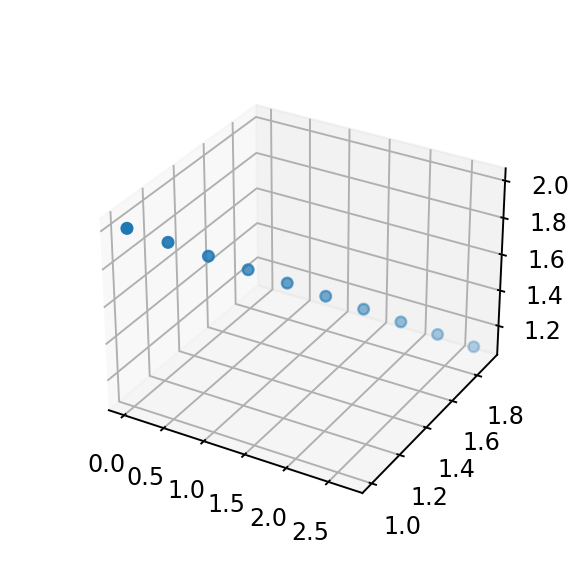

<IPython.core.display.Javascript object>


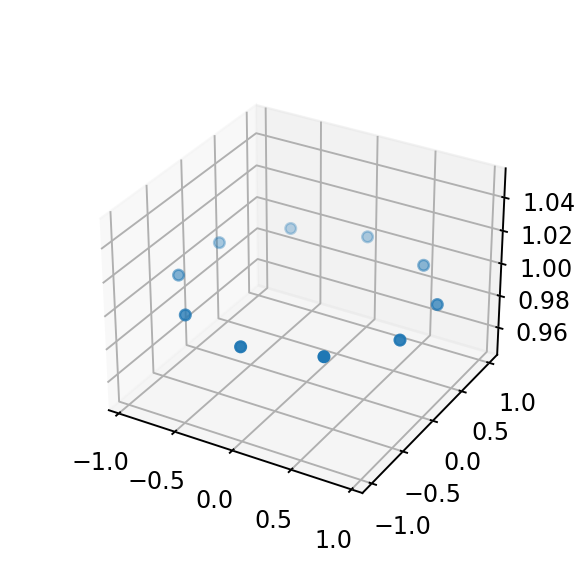

<IPython.core.display.Javascript object>


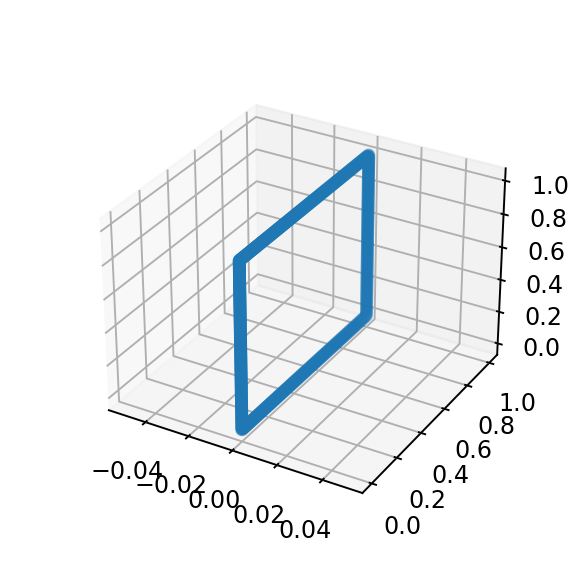

<IPython.core.display.Javascript object>


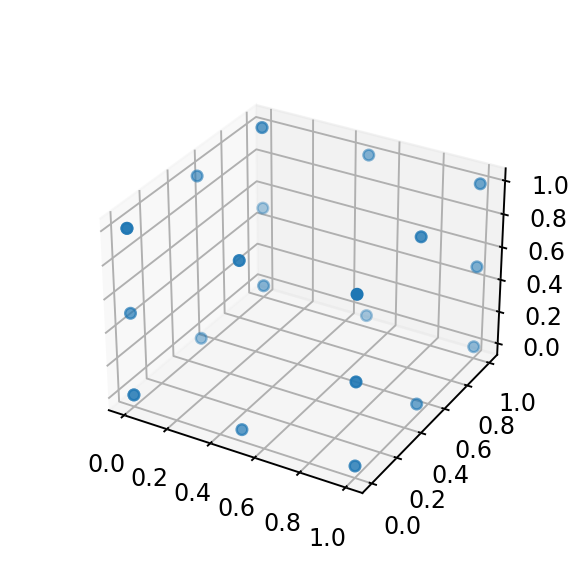

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# from mpl_toolkits.mplot3d import Axes3D

def createLine (point1, point2, size):
    step = (np.array(point2) - np.array(point1))/size
    if (step[0] == 0 ):
        x = np.ones((size))* point1[0]
    else:
        x = np.arange(point1[0],point2[0], step[0])
    if (step[1] == 0 ):
        y = np.ones((size))* point1[1]
    else:
        y = np.arange(point1[1],point2[1],step[1])
    if (step[2] == 0 ):
        z = np.ones((size))* point1[2]
    else:
        z = np.arange(point1[2],point2[2],step[2])
    c = np.ones((size))
#     print(x, y, z, c)
    return np.array([x, y, z, c])
def createCircle(radius, size):
    step = 2 * np.pi/size
    t = np.arange(0, 2*np.pi, step)
    x = radius * np.sin(t)
    y = radius * np.cos(t)
    z = np.ones((size))
    c = np.ones((size))
    return np.array([x, y, z, c])
def createSquare(point1, point2, point3, point4, size):
    input = [point1, point2, point3, point4]
    Square = []
    for i in range(len(input)):
        temp = createLine(input[i-1], input[i], size)
        if i == 0:
            Square = temp
        else:
            Square = np.concatenate((Square,temp), axis = 1)
    return Square
def createWireframe(p1, p2, p3, p4, p5, p6, p7, p8, size):
    input = [p1, p2, p3, p4, p5, p6, p7, p8]
    square1 = input[:4]
    square2 = input[4:8]
    Frame = createSquare(*square1, size)
    Frame = np.concatenate((Frame, createSquare(*square2, size)), axis = 1)
    for i in range(4):
        Frame = np.concatenate((Frame, createLine(input[i], input[i+4], size)), axis = 1)
    return Frame


res = []
res.append(createLine([0,1,2], [3,2,1], 10))
res.append(createCircle(1, 10))
res.append(createSquare([0,0,0], [0,0,1], [0,1,1], [0,1,0], 100))
res.append(createWireframe([0,0,0], [0,0,1], [0,1,1], [0,1,0],[1,0,0], [1,0,1], [1,1,1], [1,1,0], 2))
for i in range(len(res)):
    fig = plt.figure(i*2+1)
    fig.set_size_inches(2, 2)
    ax = plt.axes(projection="3d")
    ax.scatter3D(*res[i])


Next thing I have implemented Orthographic proj, and normal prespective projection. It seems as though orthographic keeps the scale of the object, while the other projections dont keep the scale. 
The 2D figures project to a flat cirface given the a paralell projection, Otherwise there would be oject where you see the other sides, given a projection that is not parallel.

For the orthographic projection, Changing the focal length changes the size of the image, changing the translation just moves the points on the image.

For the other projections, addign the rotation matrix just rotates the view of the object. The example below rotates the object on the y direction. 

Camera calibration is closer to the perspective projection with rotation. requiring the focal point for scale, translation and rotation among the 3 axis. Distance, parallel lines, vanishing points, tru size relationships are not saved.

<IPython.core.display.Javascript object>


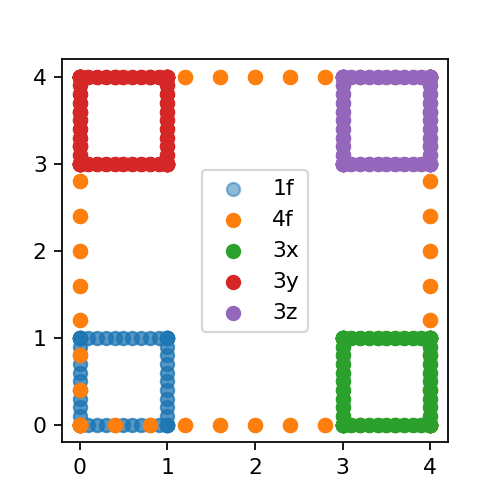

In [ ]:
f = 1
tx, ty, tz = 0, 0 ,0
def orthographicProj (f, tx, ty, tz):
    return np.array([[f,0,0,tx],
                      [0,f,0,ty],
                      [0,0,0,tz]])


colors = ['red', 'green', 'blue', 'yellow', 'orange']
labels = ['1f', '4f', '3x', '3y', '3z']


#Straight orthographic projection 3d homogeneous
P  = orthographicProj(1,0,0,0)
fig = plt.figure(2)
fig.set_size_inches(2, 2)
proj = np.dot(P,res[3])
plt.scatter(proj[0,:], proj[1,:], alpha=0.5)


P  = orthographicProj(4,0,0,0)
proj = np.dot(P,res[3])
fig.set_size_inches(2, 2)
plt.scatter(proj[0,:], proj[1,:])


P  = orthographicProj(1,3,0,0)
proj = np.dot(P,res[3])
fig.set_size_inches(2, 2)
plt.scatter(proj[0,:], proj[1,:])

P  = orthographicProj(1,0,3,0)
proj = np.dot(P,res[3])
fig.set_size_inches(2, 2)
plt.scatter(proj[0,:], proj[1,:])

P  = orthographicProj(1,3,3,3)
proj = np.dot(P,res[3])
fig.set_size_inches(2, 2)
plt.scatter(proj[0,:], proj[1,:])

plt.legend(labels)

<IPython.core.display.Javascript object>


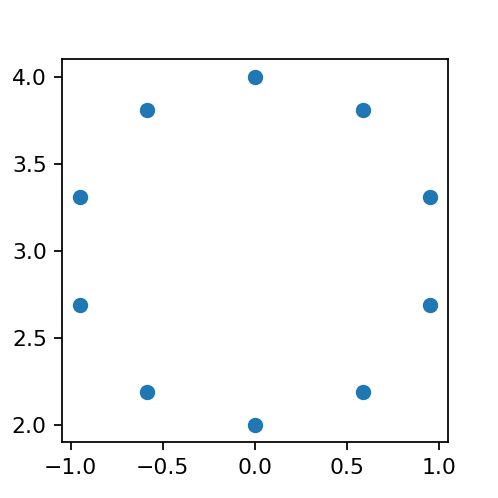

In [ ]:
#Perspective projection without rotation (i.e. the image plane is parallel to the largest face of each 3D shape)
f = 1
tx, ty, tz = 0, 0 ,0
K = np.array([[f,0,0,0],
              [0,f,0,0],
              [0,0,1,0]])
E = np.array([[1,0,0,tx],
              [0,1,0,ty],
              [0,0,1,tz],
              [0,0,0,1]])
             
P = K.dot(E)
fig = plt.figure()
fig.set_size_inches(2, 2)
proj = np.dot(P,res[1])
plt.scatter(proj[0,:], proj[1,:])


[[ 0.15425145  0.         -0.98803162  1.        ]
 [ 0.          1.          0.          1.        ]
 [ 0.98803162  0.          0.15425145  1.        ]
 [ 0.          0.          0.          1.        ]]


<IPython.core.display.Javascript object>


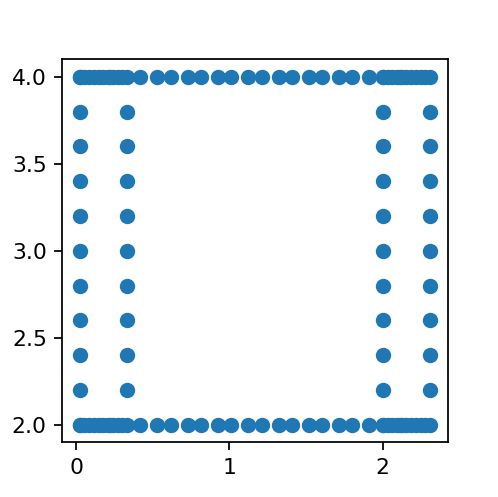

In [ ]:
#Perspective projection with rotation 
f = 2
K = np.array([[f,0,0,0],
              [0,f,0,0],
              [0,0,1,0]])
E = np.array([[1,0,0,1],
              [0,1,0,1],
              [0,0,1,1],
              [0,0,0,1]])
xtheta = 45
ytheta = 30
ztheta = 60
cx, sx = np.cos(xtheta), np.sin(xtheta)
cy, sy = np.cos(ytheta), np.sin(ytheta)
cz, sz = np.cos(ztheta), np.sin(ztheta)
# x rotation matrix
Qx = np.array([[1, 0, 0], 
            [0, cx, -sx], 
            [0, sx, cx]])
# # y rotation matrix
Qy = np.array([[cy, 0, sy], 
                    [0, 1, 0], 
                    [-sy, 0, cy]])
# z rotation matrix
Qz = np.array([[cz, -sz, 0], 
                    [sz, cz, 0], 
                    [0, 0, 1]])

E = E.astype(np.float64)
E[:3, :3] = Qy
P = K.dot(E)
print(E)
fig = plt.figure()
fig.set_size_inches(2, 2)
proj = np.dot(P,res[3])

plt.scatter(proj[0,:], proj[1,:])

<b>
<font size="+1">Exercise 2:</font>
</b>
<font size="+1">Camera geometry and stereo </font> <b>(7)</b>
To measure the focal length, we click 2 points of the same spot, and measure the camera position movement and the depth from the camera to the point of image. The measurements record to be 24.5 in depth and 12 cm in distance
The output of the focal is aroud 600. Using similar triangles we can figure this out with the given knowns explained above

In [ ]:
### This is to take images


# import cv2
# import numpy as np

# #rgb to bgr
# import matplotlib.pyplot as plt

# # A = cv2. imread('img.png',0)

# # cv2.imshow('windowName', A)
# # cam = cv2.VideoCapture(0, cv2.CAP_FIREWIRE)
# cam = cv2.VideoCapture(0)
# cv2.namedWindow("test")
# path = ""
# img_counter = 0
# while True:
#     ret, frame = cam.read()
#     if not ret:
#         print("failed to grab frame")
#         break
#     cv2.imshow("test", frame)
#     k = cv2.waitKey(1)
#     if k%256 == 27:
#     # ASCII:ESC pressed, exit
#         print("Escape hit, closing...")
#         break
#     elif k%256 == 32:
#     # ASCII:SPACE pressed, capture frame
#         # img_name = path + "frame{}.png".format(img_counter)
#         img_name = path + "scene{}.png".format(img_counter)
#         cv2.imwrite(img_name, frame)
#         # print("{} written!".format(img_name))
#         img_counter += 1
# print("{} written!".format(img_name))
# cam.release()
# cv2.destroyAllWindows()

Escape hit, closing...
scene9.png written!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))


arrPoints = []
img = "frame0.png"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)


while len(arrPoints)<1:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
img = "frame1.png"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
while len(arrPoints)<2:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break

cv.destroyAllWindows()
arrPoints = np.array(arrPoints)
print(arrPoints)
xl, xr = arrPoints[:,0]
z = 24.5
b = 12
f = z*(xl - xr)/b


print(f)

[[447 200]
 [153 206]]
600.25


</p><p>&nbsp;<font size="+1"><b>b. </b>Determine the 3D structure of a box object using
stereo with 2 images</font> <b>(2)</b>

We only have 2 images, and we take points from each to get points in the 3D. Using similar triangles again and given the change in camera movement, we can determine the depth, on top of the X Y coordinate in the real world. The translation was not a plane perpendicular to the camer axis, then there would be more knowns we need to know. there would be more camera calibrations we need to know, and the gemotry is no longer as simple as triangulation, we would need to do epipolar. You can change the number of points on the variable size
    

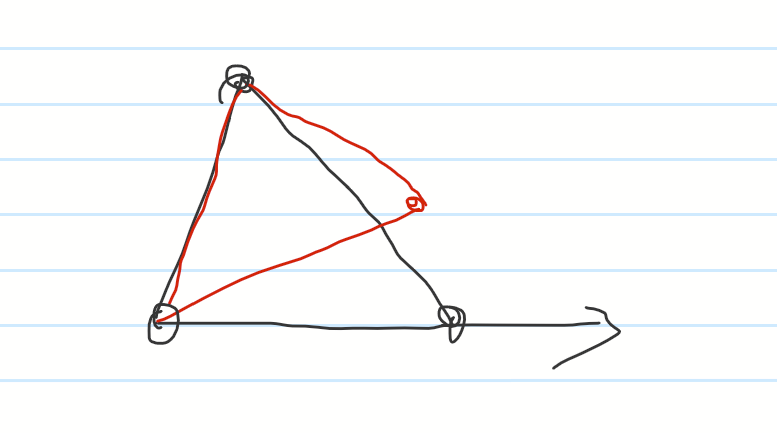



<IPython.core.display.Javascript object>


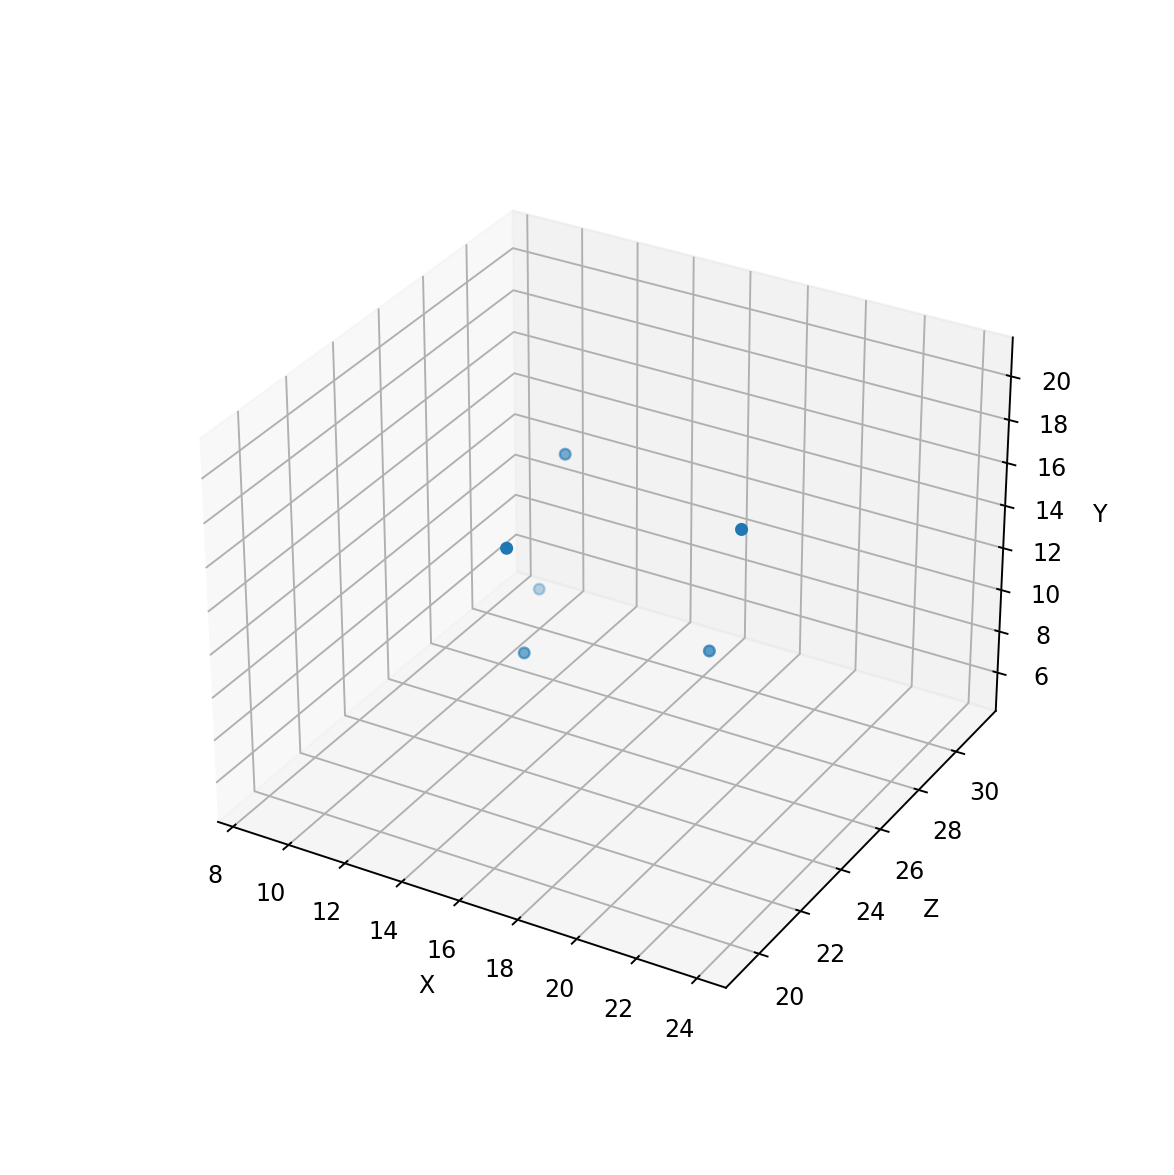

Text(0.5, 0, 'Y')

In [3]:
f = 600
b = 10
# depth = f * b/(xl - xr)


import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))


arrPoints = []
img = "box0.png"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)

size = 6
while len(arrPoints)<size:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
img = "box1.png"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)

while len(arrPoints)<size*2:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break

cv.destroyAllWindows()
arrPoints = np.array(arrPoints)
l = arrPoints[:size]
r = arrPoints[size:size*2]

z = f * b/(l[:,0] - r[:,0])
x = l[:,0]*z/f
y = l[:,1]*z/f


c = np.ones((size))
res = np.array([x, z, y, c])
fig = plt.figure(10)
fig.set_size_inches(4, 4)
ax = plt.axes(projection="3d")
ax.scatter3D(*res)
min = np.min(res, axis = 1)
max = np.max(res, axis = 1)
ax.set_xlim3d(min[0]-5, max[0]+5)
ax.set_ylim3d(min[1]-5, max[1]+5)
ax.set_zlim3d(min[2]-5, max[2]+5)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')


<font size="+1"><b>c.</b> Determine the 3D structure of a box object using
stereo with a set of images</font>

<br> REal data
Based on a few images, and knowing the focal lngth, we will track each point on the sequence of images. And then the image will try to recontruct the 3d.
Note that the tracking is not that good since I moved the camera by .5 cm intervals. To improve the image reconstruction maybe change the camera difference to less than .5 cm. You can change the number of points to be set under numPoints.


<IPython.core.display.Javascript object>


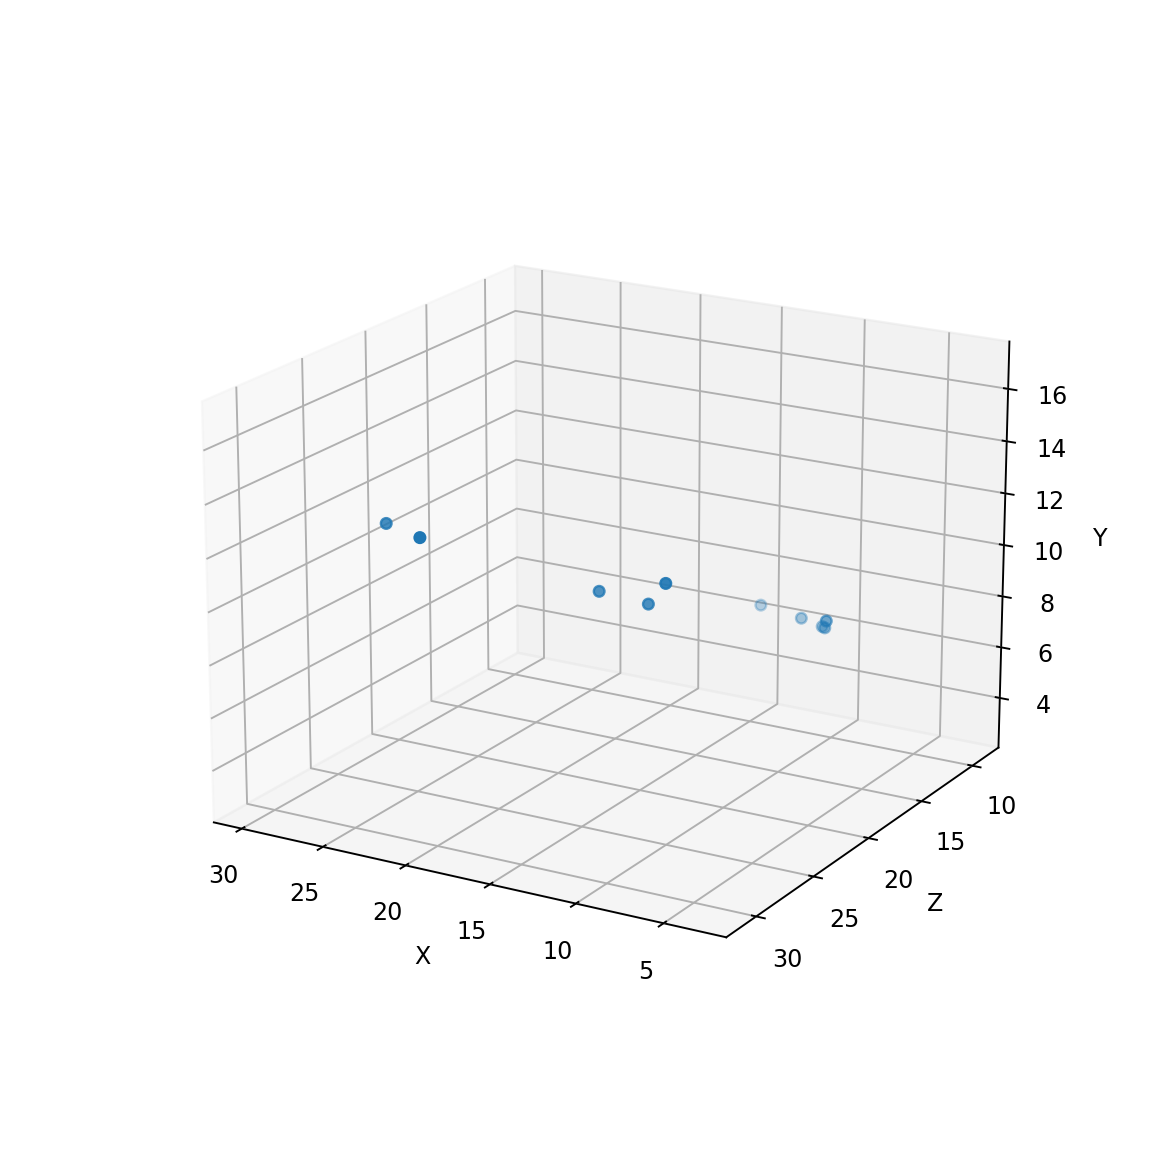

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import lk as tracker
%matplotlib notebook
f = 600
b = .5
numPoints = 10
images = 8
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))

Input = cv.imread("scene0.png")
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
arrPoints = []

while len(arrPoints)<numPoints:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
# constantPoints = arrPoints[2:4]
# arrPoints[2:4] = [0,0], [0,0]
init_corners = np.array(arrPoints).T

tracker.initTracker(Input, init_corners)
init_corners = init_corners.T
# print(init_corners)
cv.destroyAllWindows()
A = np.zeros((numPoints,images))
for i in range(1,images+1):
    # read frame
    frame = cv.imread("scene{}.png".format(i))
    points = tracker.updateTracker(frame)
    points = points.T
    for j in range(len(points)):
        frame = cv.circle(frame, (int(points[j,0]), int(points[j,1])), radius=10, color=(0, 0, 255), thickness=-1)
        # print(init_corners[j,:] - points[j,:])
        A[j,i-1] =  init_corners[j,0] - points[j,0]
       
#     print(A)
    cv.imshow("test", frame)
    k = cv.waitKey(0)
df = b*f*np.arange(1,images+1,1)
df = np.array(([df]))
Z = []

for i in range(numPoints):  
    M = np.array(([A[i]]))
    
#     print("m",M)
#     print("df", df)
    # line of best fit using least squares
    z = np.linalg.pinv(M.T) @ df.T
#     print(z)
    Z.append(z[0])
z = np.array(Z).flatten()


x = init_corners[:,0]*z/f
y = init_corners[:,1]*z/f


c = np.ones((numPoints))
# print(x, y, z, c)
res = np.array([x, z, y, c])

fig = plt.figure(10)
fig.set_size_inches(4, 4)
ax = plt.axes(projection="3d")
ax.scatter3D(*res)
min = np.min(res, axis = 1)
max = np.max(res, axis = 1)
ax.set_xlim3d(min[0]-5, max[0]+5)
ax.set_ylim3d(min[1]-5, max[1]+5)
ax.set_zlim3d(min[2]-5, max[2]+5)

# print(Z)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
cv.destroyAllWindows()


For the synthetic data, I have used the wireframe  translation and rotation from ealier, and have move the camera by 1 every time for the new image. This has reconstructed the wireframe in space perfectictly since we have perfect data construction in comparison to the real data.

<IPython.core.display.Javascript object>


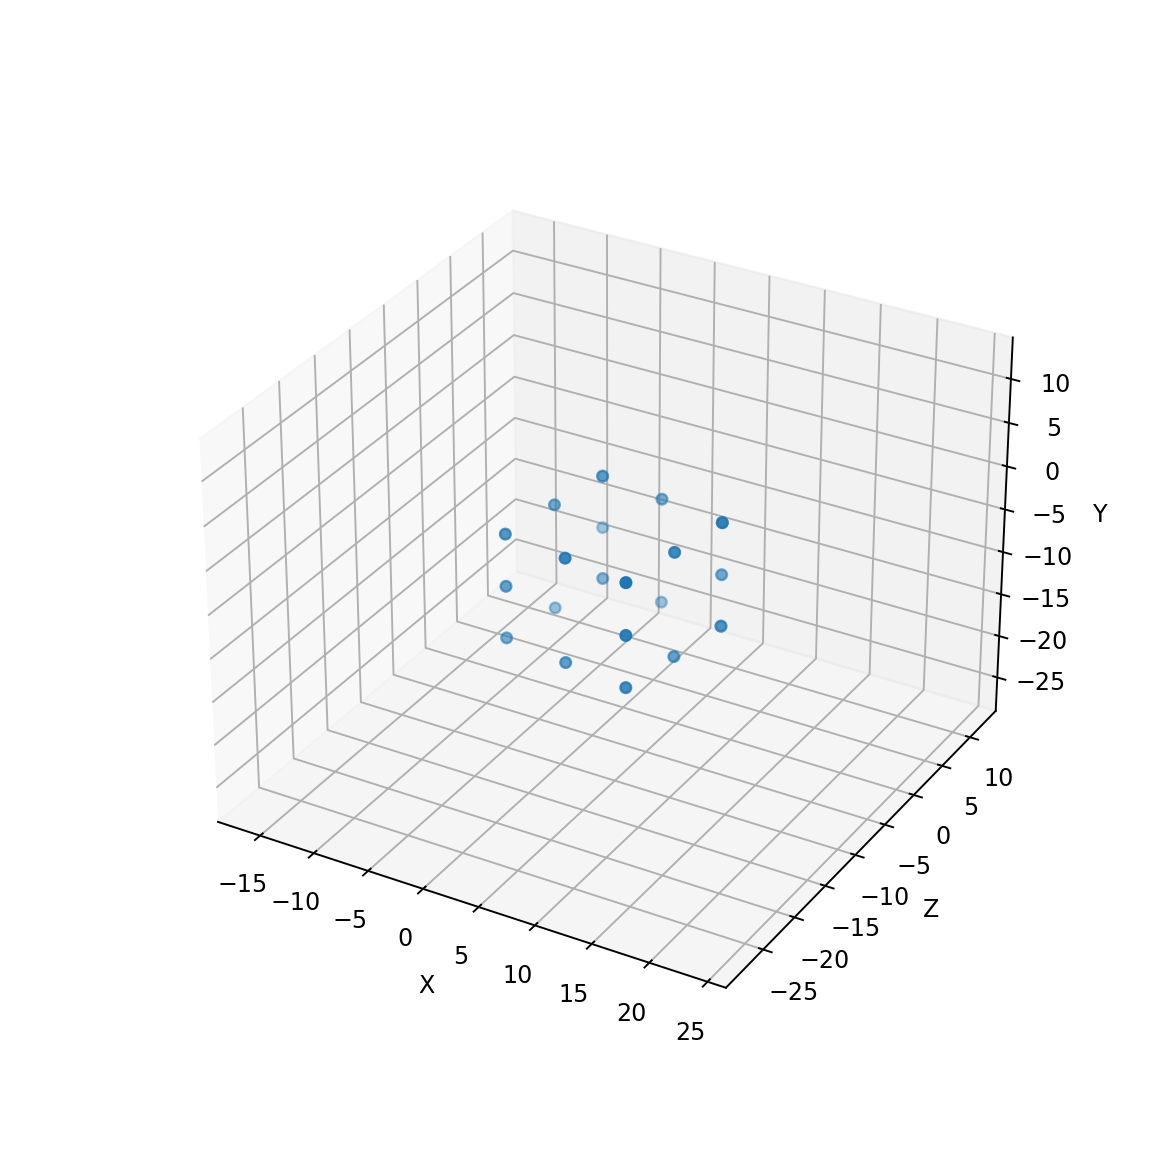

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook


numPoints = 24
images = 8

#Perspective projection with rotation 
f = 1
b = 1
K = np.array([[f,0,0,0],
              [0,f,0,0],
              [0,0,1,0]])
E = np.array([[1,0,0,1],
              [0,1,0,1],
              [0,0,1,1],
              [0,0,0,1]])
ytheta = 30

cy, sy = np.cos(ytheta), np.sin(ytheta)

# # y rotation matrix
Qy = np.array([[cy, 0, sy], 
                    [0, 1, 0], 
                    [-sy, 0, cy]])

E = E.astype(np.float64)
E[:3, :3] = Qy
P = K.dot(E)



input = createWireframe([0,0,0], [0,0,10], [0,10,10], [0,10,0],[10,0,0], [10,0,10], [10,10,10], [10,10,0], 2)


def translatePoints(P, input):
    input = np.dot(P,input)
    input = (input/input[2])
    input = np.array(input).T
    return input
init_corners = translatePoints(P, input)

# print(init_corners)
cv.destroyAllWindows()
A = np.zeros((numPoints,images))
for i in range(1,images+1):
    # read frame
    E[0,3] = i
    P = K.dot(E)
    
    points = translatePoints(P, input)
    
    for j in range(len(points)):
        # print(init_corners[j,:] - points[j,:])
        
        A[j,i-1] =  init_corners[j,0] - points[j,0]
       

df = b*f*np.arange(1,images+1,1)
df = np.array(([df]))
Z = []

for i in range(numPoints):  
    M = np.array(([A[i]]))
    # line of best fit using least squares
    z = np.linalg.pinv(M.T) @ df.T
    Z.append(z[0])
z = np.array(Z).flatten()


x = init_corners[:,0]*z/f
y = init_corners[:,1]*z/f


c = np.ones((numPoints))
# print(x, y, z, c)
res = np.array([x, z, y, c])

fig = plt.figure(10)
fig.set_size_inches(4, 4)
ax = plt.axes(projection="3d")
ax.scatter3D(*res)
min = np.min(res, axis = 1)
max = np.max(res, axis = 1)


ax.set_xlim3d(min[0]-15, max[0]+15)
ax.set_ylim3d(min[1]-15, max[1]+15)
ax.set_zlim3d(min[2]-15, max[2]+15)

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
cv.destroyAllWindows()
